<h1><img align="right" width="350" src="img/ATU-Logo-Full-RGB-Green.jpg"> Applied Statistics - Module Tasks
</h1>
<p> 
Course: HDip in Computing in Data Analytics <br>
Module: Applied Statistics <br>
Lecturer: Ian McLoughlin <br>

Module Tasks

Student: Eilis Donohue (G00006088)


Software Used: 
 - Python v3.10 and higher [HOLD]
 - Jupyter Notebook 6.5.2 [HOLD] 
 </p>
 
---

## Table of Contents
- [Task 1 - Lady Tasting Tea](#Task1)
- [Task 2 - numpy's Normal Distribution](#Task2)
- [Task 3 - t-test Calculation](#Task3)
- [Task 4 - ANOVA](#Task4)
- [References](#Ref)


---


### Task 1 - Lady Tasting Tea <a id="Task1"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>

The possible number of combinations considering n number of cups with k number which have the attribute are calculated using the binomial coefficient [1]:

$ \binom{n}{k} = \frac{n!}{k!(n-k)!} $

If there are 12 cups of tea - 6 of which have the tea added first then the problem becomes:

$ \binom{12}{6} = \frac{12!}{6!(12-6)!} $

There are 924 possible permutations given a completely random outcome of 12 cups with 6 having the attribute (milk first). Therefore there is a 1 in 924 chance of identifying the 6 cups correctly.

This is derived from the fact that 12! is the number of ways 12 things can be combined randomly:

This is described by:

$ 12! = 12 \times 11 \times 10 \times 9 \times 8 \times 7 \times 6 \times 5 \times 4 \times 3 \times 2 \times 1 $

In the experiment, only 6 things are being chosen from 12: 

This can be written as where the 6! below the line cancels the last 6 terms of the 12! above the line:

$ 12 \times 11 \times 10 \times 9 \times 8 \times 7 = \frac{12!}{6!} $

This is the $ \frac{n!}{(n-k)!} $ part of the equation above.

This is equal to 665280 combinations.

In addition, for the purpose of the experiment where 6 things are picked, the order in which they are picked does not matter. The number of ways the 6 items could be ordered is equal to:

$ 6! = 6 \times 5 \times 4 \times 3 \times 2 \times 1 $

This is equal to 720

So, the number above must be divided by the number of ways the chosen items could be shuffled. This is the $ \frac{1}{k!} $ part of the binomial coefficient equation above.

This reduces the number of ways the 6 items can be picked (assuming that these are not orderable), to $ \frac{665280}{720} = 924 $ 

So, if 6 things with a given attritube are to be picked, assuming that they're being chosen is entirely due to chance, the chances of the 6 things with the attribute being picked from 12 is 1 in 924 or 0.11%.

In [10]:
# Python implementation of the Lady Tasting Tea problem
import math

# Function to compute the number of combinations of selection - The binomial coefficient [1]
def binomial_coef(n, k):
  combinations = math.factorial(n) / (math.factorial(k) * math.factorial (n - k))   
  return combinations

In [11]:
cups = 12      # no of cups
choose = 6    # no of cups to choose which have a given attribute (milk first!)

# Calculate the total number of combinations of picking 6 cups from 12 
#total_combinations = binomial_coef(cups, choose)
# Use math inbuilt .comb instead
total_combinations = math.comb(cups, choose)  # [4]
# The probability of picking all 6 with the attribute is (1 way of doing this)
Prob_all_successes = 1 / total_combinations

print(f'The total number of combination selections for {cups} cups where {choose} are chosen is {total_combinations:.0f}')
print(f'Probability of guessing {choose} cups with given attribute correctly is {Prob_all_successes:.4f} or {Prob_all_successes*100:.2f}%')

The total number of combination selections for 12 cups where 6 are chosen is 924
Probability of guessing 6 cups with given attribute correctly is 0.0011 or 0.11%


In [12]:
# Python implementation of problem with 1 'mistake' or success count of 5, 4 etc

no_of_combo_1_mistake = (math.comb(choose, choose-1))**2
no_of_combo_2_mistake = (math.comb(choose, choose-2))**2
print(f'Number of combinations for 1 mistake {no_of_combo_1_mistake}')
print(f'Number of combinations for 2 mistakes {no_of_combo_2_mistake}') 

Number of combinations for 1 mistake 36
Number of combinations for 2 mistakes 225


In [13]:
combinations_1err = 1 + no_of_combo_1_mistake  
Prob_1err = combinations_1err / total_combinations
combinations_2err = combinations_1err + no_of_combo_2_mistake 
Prob_2err = combinations_2err / total_combinations
print(f'The number of combinations for where there is 1 error allowed in {choose} cups is {combinations_1err}')
print(f'Probability of guessing at least {choose-1} of {choose} cups is {Prob_1err:.4f} or {Prob_1err*100:.2f}%')
print(f'Probability of guessing at least {choose-2} of {choose} cups is {Prob_2err:.4f} or {Prob_2err*100:.2f}%')

The number of combinations for where there is 1 error allowed in 6 cups is 37
Probability of guessing at least 5 of 6 cups is 0.0400 or 4.00%
Probability of guessing at least 4 of 6 cups is 0.2835 or 28.35%


The hypergeometric distribution describes probability distribution for this problem as above  [2]. It is a discrete probability distribution that describes the probability of k successes (random draws for which the object drawn has a specified feature) in n draws, without replacement, from a finite population of size N that contains exactly K objects with that feature, wherein each draw is either a success or a failure.

$ px(k) = Pr(X=k) = \frac{\binom{K}{k} \binom{N-K}{n-k}}{\binom{N}{n}} ,$

where
N is the population size

K is the number of success states in the population

n is the number of draws

k is the number of observed successes


In [14]:
# hypergeometric distribution
# total number of items is N
# no of items with the attribute is K
# no of draws is n
# successes is k
#pmf =  (combinations_form(K, k) * combinations_form((N-K), (n-k)))/combinations_form(N,n)   # [2]

pmf_4_of_6 =  (binomial_coef(6, 4) * binomial_coef((12-6), (6-4)))/binomial_coef(12,6)   # [1]
pmf_5_of_6 =  (binomial_coef(6, 5) * binomial_coef((12-6), (6-5)))/binomial_coef(12,6)   # [1]
pmf_6_of_6 = (binomial_coef(6, 6) * binomial_coef((12-6), (6-6)))/binomial_coef(12,6)   # [1]

print(f'Probability of picking exactly 4 of 6 is {pmf_4_of_6:.4f} \n' 
      f'exactly 5 of 6 is {pmf_5_of_6:.4f} \n' 
      f'and 6 of 6 is {pmf_6_of_6:.4f}')
# Add the probability of exactly 4, 5, 6 to get the probability of at least 4
pmf_4_of_6_at_least = pmf_4_of_6 + pmf_5_of_6 + pmf_6_of_6

print(f'Probability of picking at least 4 with the attribute is {pmf_4_of_6_at_least:.4f}')

Probability of picking exactly 4 of 6 is 0.2435 
exactly 5 of 6 is 0.0390 
and 6 of 6 is 0.0011
Probability of picking at least 4 with the attribute is 0.2835


### Significance of allowing 2 mistakes

So, if the experiment is designed whereby the tea-taster is allowed to make 2 mistakes, then there is a 28% chance that they will "pass" the test. Therefore there is a significant probability that the experiment will generate a false positive, i.e., the taster will choose the correct cups purely by chance. By comparison, allowing only 1 mistake would mean a <5% chance of picking the correct cups. This makes for a more robust experiment in that a false positive is unlikely or at least there is a <5% probability of a false positive.

### Task 2 - numpy's Normal Distribution <a id="Task2"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>

In [15]:
# Generate the random normal distributed data with numpy generator

import numpy as np
import matplotlib.pyplot as plt

n = 100000
mean = 10
st_dev = 3

data = np.random.normal(loc=mean, scale=st_dev, size=n)


In [16]:
# scipy.stats.shapiro() test
import scipy
scipy.stats.shapiro(data)

ShapiroResult(statistic=0.9999672174453735, pvalue=0.4976937770843506)

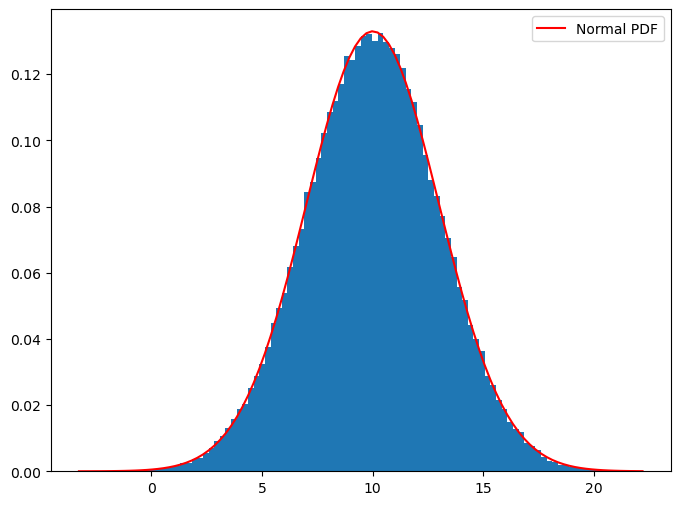

In [17]:
# Using scipy stats for normal pdf
from scipy.stats import norm

no_of_bins = 100
plt.figure(figsize=(8, 6))
count, bins, _ = plt.hist(data, bins=no_of_bins, density=True)  # Plot the normal random data normalised, return the bins
#print(bins)

pdf_fitted_norm = norm.pdf(bins, loc=mean, scale=st_dev)
plt.plot(bins, pdf_fitted_norm, 'r', label='Normal PDF');
plt.legend();

### Task 3 - t-test Calculation <a id="Task3"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>

### Task 4 - ANOVA <a id="Task4"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>

## References <a id="Ref"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>

1. https://en.wikipedia.org/wiki/Lady_tasting_tea (accessed 23th Sept 2024)
2. https://en.wikipedia.org/wiki/Hypergeometric_distribution (accessed 26th Sept 2024)
3. https://numpy.org/doc/stable/reference/random/index.html (accessed 26th Sept 2024)
4. https://docs.python.org/3/library/math.html#math.comb (accessed 5th Oct 2024)